<a href="https://colab.research.google.com/github/smitRoot/Hospitality-Analysis/blob/main/Potatodiseaseclassifciation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [4]:
!kaggle datasets download -d arjuntejaswi/plant-village


Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village
License(s): unknown
 99% 326M/329M [00:02<00:00, 160MB/s]
100% 329M/329M [00:02<00:00, 156MB/s]


In [5]:
import zipfile

with zipfile.ZipFile('plant-village.zip', 'r') as zip_ref:
    zip_ref.extractall('plant_village_data')


In [6]:
import os
import shutil

# Define source and destination paths
source_dir = 'plant_village_data'
destination_dir = 'potato_data'

# Create the destination directory
os.makedirs(destination_dir, exist_ok=True)

# Move only potato-related folders or files
for folder in os.listdir(source_dir):
    if 'potato' in folder.lower():  # Check if the folder name contains 'potato'
        shutil.move(os.path.join(source_dir, folder), destination_dir)

# Verify the content of the new folder
print("Folders moved to 'potato_data':", os.listdir(destination_dir))


Folders moved to 'potato_data': []


In [44]:
# List the contents of the potato data folder
os.listdir(destination_dir)


['Potato___Late_blight', 'Potato___Early_blight', 'Potato___healthy']

In [9]:
import os

# Path to extracted dataset
source_dir = 'plant_village_data'

# Walk through the directory and list all folders
for root, dirs, files in os.walk(source_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)


Root: plant_village_data
Directories: ['PlantVillage']
Files: []
----------------------------------------
Root: plant_village_data/PlantVillage
Directories: ['Tomato__Target_Spot', 'Tomato_Bacterial_spot', 'Potato___Late_blight', 'Tomato_Septoria_leaf_spot', 'Tomato_Late_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Tomato_mosaic_virus', 'Tomato_Leaf_Mold', 'Pepper__bell___Bacterial_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Potato___Early_blight', 'Pepper__bell___healthy', 'Tomato_Early_blight', 'Tomato_healthy', 'Potato___healthy']
Files: []
----------------------------------------
Root: plant_village_data/PlantVillage/Tomato__Target_Spot
Directories: []
Files: ['8f2a090d-92c1-4bf4-8806-a15a6de7d304___Com.G_TgS_FL 8219.JPG', '7b3f0354-12f7-471d-910a-32f3b671f95d___Com.G_TgS_FL 0773.JPG', '34c49f9c-0733-44d6-ad40-d97d7d655d0d___Com.G_TgS_FL 0714.JPG', '70ff96c1-499a-4e6e-b5ef-5ad0e40c18d5___Com.G_TgS_FL 0665.JPG', '1dcaf64c-19e6-4854-8d99-53c30dbefcef___Com.G_

In [10]:
import shutil

# Destination for potato data
destination_dir = 'potato_data'
os.makedirs(destination_dir, exist_ok=True)

source_dir = 'plant_village_data/PlantVillage'

# Move folders related to potatoes
for folder in os.listdir(source_dir):
    if 'potato' in folder.lower():  # Adjust if potato data uses a different naming convention
        shutil.move(os.path.join(source_dir, folder), destination_dir)

# Check if potato data was moved
print("Folders in 'potato_data':", os.listdir(destination_dir))


Folders in 'potato_data': ['Potato___Late_blight', 'Potato___Early_blight', 'Potato___healthy']


In [11]:
# List contents of the potato_data folder
os.listdir(destination_dir)


['Potato___Late_blight', 'Potato___Early_blight', 'Potato___healthy']

In [12]:
Image_size=256
Batch_size=32
Channels=3
EPOCHS=50

In [13]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "potato_data",
    shuffle=True,
    image_size=(Image_size,Image_size),
    batch_size=Batch_size
    )

Found 2152 files belonging to 3 classes.


In [14]:
class_names=dataset.class_names

In [15]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [16]:
len(dataset)

68

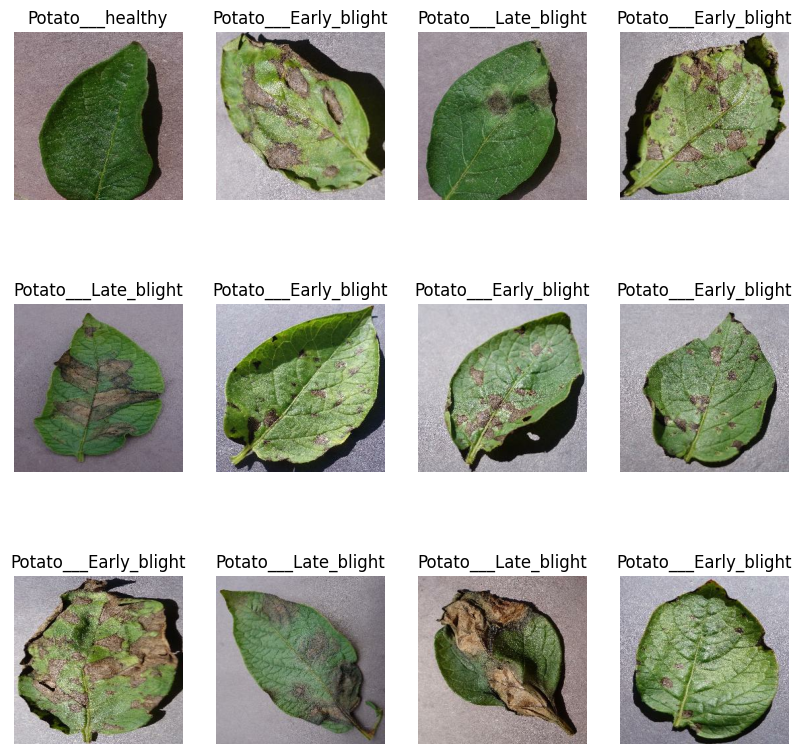

In [17]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.axis("off")
    #plt.title(label_batch[i])
    plt.title(class_names[label_batch[i]])

In [41]:
## 80% ==> training
## 20% ==>10% validation,10% test

In [18]:
train_size=0.8
dataset.take(10)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=10000):
  ds_size=len(ds)

  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  train_ds=ds.take(train_size)
  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)



  return train_ds, val_ds, test_ds


In [20]:
train_ds, val_ds, test_ds= get_dataset_partitions_tf(dataset)


In [21]:
len(train_ds)

54

In [22]:
len(test_ds)

8

In [23]:
len(val_ds)

6

In [24]:
resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.Resizing(Image_size,Image_size),
    tf.keras.layers.Rescaling(1.0/255)
])

In [25]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip (mode='horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2)



])

In [37]:
input_shape=(Batch_size, Image_size,Image_size,Channels)
n_classes=3


model =models.Sequential([
    layers.Input(shape=(256, 256, 3)),

    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')


])

model.build()

In [38]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                               

In [39]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [40]:
history=model.fit(train_ds,epochs=20,batch_size=Batch_size,verbose=1,validation_data=val_ds)

Epoch 1/20
54/54 [==============================] - 151s 3s/step - loss: 0.8196 - accuracy: 0.5909 - val_loss: 0.5749 - val_accuracy: 0.7656
Epoch 2/20
54/54 [==============================] - 148s 3s/step - loss: 0.4137 - accuracy: 0.8426 - val_loss: 0.3423 - val_accuracy: 0.8698
Epoch 3/20
54/54 [==============================] - 151s 3s/step - loss: 0.2944 - accuracy: 0.8767 - val_loss: 0.2323 - val_accuracy: 0.9219
Epoch 4/20
54/54 [==============================] - 150s 3s/step - loss: 0.2688 - accuracy: 0.8941 - val_loss: 0.2352 - val_accuracy: 0.9010
Epoch 5/20
54/54 [==============================] - 147s 3s/step - loss: 0.2049 - accuracy: 0.9201 - val_loss: 0.1905 - val_accuracy: 0.9271
Epoch 6/20
54/54 [==============================] - 146s 3s/step - loss: 0.1833 - accuracy: 0.9317 - val_loss: 0.1523 - val_accuracy: 0.9375
Epoch 7/20
54/54 [==============================] - 145s 3s/step - loss: 0.1419 - accuracy: 0.9450 - val_loss: 0.1520 - val_accuracy: 0.9479
Epoch 8/20
54

In [83]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 890ms/step - accuracy: 0.9298 - loss: 0.2254


In [84]:
scores

[0.22067950665950775, 0.9353448152542114]

In [87]:
history

import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
!kaggle datasets download -d arjuntejaswi/plant-village
import zipfile

with zipfile.ZipFile('plant-village.zip', 'r') as zip_ref:
    zip_ref.extractall('plant_village_data')
import os
import shutil

# Define source and destination paths
source_dir = 'plant_village_data'
destination_dir = 'potato_data'

# Create the destination directory
os.makedirs(destination_dir, exist_ok=True)

# Move only potato-related folders or files
for folder in os.listdir(source_dir):
    if 'potato' in folder.lower():  # Check if the folder name contains 'potato'
        shutil.move(os.path.join(source_dir, folder), destination_dir)

# Verify the content of the new folder
print("Folders moved to 'potato_data':", os.listdir(destination_dir))
import os
import shutil

# Define source and destination paths
source_dir = 'plant_village_data'
destination_dir = 'potato_data'

# Create the destination directory
os.mak

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
len(history.history['accuracy'])

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 664ms/step
predicted label: Potato___Late_blight


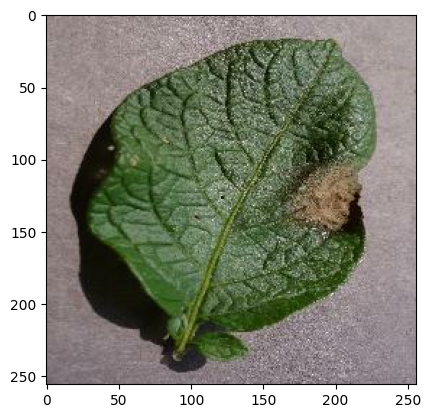

In [41]:
import  numpy as np
for images_batch,labels_batch in test_ds.take(1):
  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:",class_names[first_label])

  batch_prediction=model.predict(images_batch)
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [42]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)

  predictions=model.predict(img_array)

  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

In [43]:
model_version=1
model.save(f"models/{model_version}")